In [2]:
import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
import os
import datasets

In [11]:
import shutil
from datasets import config

cache_dir = config.HF_DATASETS_CACHE
shutil.rmtree(cache_dir, ignore_errors=True)

In [12]:
dfs = { 
    category: datasets.load_dataset(
        'tiginamaria/bug-localization', 
        category,
        split='dev',
        ignore_verifications=True,
    ).to_pandas()
    for category in ['py', 'java', 'kt', 'mixed']
}

/Users/Maria.Tigina/PycharmProjects/bug-localization/venv/lib/python3.11/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/4347 [00:00<?, ? examples/s]

/Users/Maria.Tigina/PycharmProjects/bug-localization/venv/lib/python3.11/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/2533 [00:00<?, ? examples/s]

/Users/Maria.Tigina/PycharmProjects/bug-localization/venv/lib/python3.11/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/619 [00:00<?, ? examples/s]

/Users/Maria.Tigina/PycharmProjects/bug-localization/venv/lib/python3.11/site-packages/datasets/load.py:2096: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating dev split:   0%|          | 0/2370 [00:00<?, ? examples/s]

In [17]:
repos_columns = ['repo_symbols_count', 'repo_tokens_count', 'repo_lines_count', 'repo_files_without_tests_count']
diff_columns = ['changed_symbols_count', 'changed_tokens_count', 'changed_lines_count', 'changed_files_count', 'changed_files_without_tests_count']
issue_columns = ['issue_symbols_count', 'issue_tokens_count', 'issue_lines_count', 'issue_links_count', 'issue_code_blocks_count']

# Python

In [32]:
dfs['py'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,8543,thealgorithms/python/295/289,thealgorithms,python,https://github.com/TheAlgorithms/Python/issues...,https://github.com/TheAlgorithms/Python/pull/295,https://github.com/TheAlgorithms/Python/pull/295,1,fixes,ProjectEuler -- Problem 1 -- solv2.py -- Error,...,191,57,2,1,3,2018-04-16 13:59:32,162825,Python,"{'Python': 2826228, 'Dockerfile': 406}",MIT License
1,5531,electron/electron/8668/8555,electron,electron,https://github.com/electron/electron/issues/8555,https://github.com/electron/electron/pull/8668,https://github.com/electron/electron/pull/8668,1,close,Mac app store build uses non-public APIs,...,539,128,15,0,0,2017-02-13 07:46:55,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
2,5532,electron/electron/8640/8608,electron,electron,https://github.com/electron/electron/issues/8608,https://github.com/electron/electron/pull/8640,https://github.com/electron/electron/pull/8640,1,close,Debug symbols not generated for Release build,...,154,36,1,0,0,2017-02-09 07:53:27,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
3,6847,keras-team/keras/18352/15282,keras-team,keras,https://github.com/keras-team/keras/issues/15282,https://github.com/keras-team/keras/pull/18352,https://github.com/keras-team/keras/pull/18352,1,solve,MobileNetV3 models can't infer the static shape,...,5226,1230,103,3,1,2023-08-18 10:34:29,58976,Python,"{'Python': 11774453, 'Starlark': 290645, 'Shel...",Apache License 2.0
4,6848,keras-team/keras/17498/17199,keras-team,keras,https://github.com/keras-team/keras/issues/17199,https://github.com/keras-team/keras/pull/17498,https://github.com/keras-team/keras/pull/17498,1,fixes,efficientnetBx model.save() fails due to seria...,...,3215,827,59,1,0,2023-01-30 07:49:59,58976,Python,"{'Python': 11774453, 'Starlark': 290645, 'Shel...",Apache License 2.0


In [45]:
dfs['py'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,4.347000e+03,4.347000e+03,4.347000e+03,4347.000000
mean,2.093342e+06,4.922519e+05,5.522149e+04,310.962043
std,3.138748e+06,8.861003e+05,8.307564e+04,476.602329
min,3.210000e+02,7.800000e+01,9.000000e+00,1.000000
1%,4.931460e+04,1.108704e+04,1.421660e+03,10.000000
25%,4.443025e+05,9.822050e+04,1.267100e+04,68.000000
50%,8.929960e+05,1.981670e+05,2.468400e+04,141.000000
75%,3.337002e+06,7.638120e+05,8.525900e+04,402.000000
99%,1.275616e+07,3.606981e+06,3.125979e+05,1868.540000
max,9.880201e+07,3.817069e+07,3.077782e+06,12013.000000


In [44]:
dfs['py'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,4347.000000,4347.000000,4347.000000,4347.000000,4347.00000
mean,1982.479641,452.647343,42.284564,2.093168,1.62940
std,4335.880062,1255.491799,80.877899,1.823005,1.47521
min,1.000000,1.000000,1.000000,1.000000,1.00000
1%,32.460000,7.000000,1.000000,1.000000,1.00000
25%,287.000000,64.000000,6.000000,1.000000,1.00000
50%,802.000000,183.000000,17.000000,2.000000,1.00000
75%,2082.500000,466.000000,47.000000,2.000000,2.00000
99%,19160.000000,4188.860000,369.700000,10.000000,8.00000
max,135872.000000,61633.000000,1738.000000,21.000000,20.00000


In [21]:
dfs['py'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,4347.000000,4347.000000,4347.000000,4347.000000,4347.000000
mean,1436.484702,397.361859,29.125604,0.752243,0.953301
std,1895.584075,542.522714,36.014344,1.671625,1.218390
min,43.000000,13.000000,1.000000,0.000000,0.000000
1%,73.000000,16.000000,1.000000,0.000000,0.000000
25%,345.000000,85.000000,6.000000,0.000000,0.000000
50%,768.000000,199.000000,18.000000,0.000000,1.000000
75%,1731.000000,467.000000,38.000000,1.000000,1.000000
99%,9292.040000,2757.080000,174.620000,6.000000,5.000000
max,30221.000000,4491.000000,586.000000,56.000000,11.000000


# Java

In [31]:
dfs['java'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,162,square/okhttp/1085/1034,square,okhttp,https://github.com/square/okhttp/issues/1034,https://github.com/square/okhttp/pull/1085,https://github.com/square/okhttp/pull/1085,1,closes,SpdyConnection.pushExecutor has zero keep-aliv...,...,475,105,6,1,0,2014-10-11 14:11:59,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
1,161,square/okhttp/1106/938,square,okhttp,https://github.com/square/okhttp/issues/938,https://github.com/square/okhttp/pull/1106,https://github.com/square/okhttp/pull/1106,1,closes,SpdyConnection synchronization problem in goAway,...,192,43,2,0,0,2014-10-26 14:28:50,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
2,170,square/okhttp/518/184,square,okhttp,https://github.com/square/okhttp/issues/184,https://github.com/square/okhttp/pull/518,https://github.com/square/okhttp/pull/518,1,closes,"OkHttp changes the global SSL context, breaks ...",...,1769,605,27,0,0,2014-02-09 00:24:27,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
3,169,square/okhttp/628/627,square,okhttp,https://github.com/square/okhttp/issues/627,https://github.com/square/okhttp/pull/628,https://github.com/square/okhttp/pull/628,1,fix,SpdyConnection clears the old settings without...,...,687,152,6,1,0,2014-03-10 21:05:36,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0
4,168,square/okhttp/631/627,square,okhttp,https://github.com/square/okhttp/issues/627,https://github.com/square/okhttp/pull/631,https://github.com/square/okhttp/pull/631,1,fix,SpdyConnection clears the old settings without...,...,687,152,6,1,0,2014-03-11 04:15:42,44252,Kotlin,"{'Kotlin': 3059143, 'Java': 744989, 'Shell': 2...",Apache License 2.0


In [23]:
dfs['java'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,2.533000e+03,2.533000e+03,2.533000e+03,2533.000000
mean,1.000722e+07,2.002247e+06,2.583836e+05,2192.163443
std,1.993229e+07,4.085510e+06,4.950649e+05,2837.282563
min,3.258600e+04,6.587000e+03,9.920000e+02,12.000000
1%,1.696122e+05,3.596468e+04,4.873280e+03,38.320000
25%,1.578586e+06,3.331190e+05,4.575200e+04,340.000000
50%,4.887142e+06,1.022790e+06,1.355550e+05,1112.000000
75%,1.530718e+07,2.998472e+06,3.940670e+05,4040.000000
99%,3.493958e+07,7.175641e+06,9.393272e+05,7754.720000
max,2.422849e+08,4.924220e+07,6.198704e+06,28101.000000


In [24]:
dfs['java'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000
mean,2715.694828,534.555468,52.219897,2.509672,1.934465
std,7489.642886,1500.470595,150.415710,2.491456,1.983455
min,15.000000,3.000000,1.000000,1.000000,1.000000
1%,47.280000,9.000000,1.000000,1.000000,1.000000
25%,392.000000,78.000000,7.000000,1.000000,1.000000
50%,1112.000000,217.000000,21.000000,2.000000,1.000000
75%,2865.000000,566.000000,54.000000,3.000000,2.000000
99%,23467.880000,4598.800000,464.720000,13.680000,11.000000
max,258589.000000,52089.000000,5887.000000,22.000000,17.000000


In [33]:
dfs['java'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000
mean,2089.808922,520.391236,39.846822,0.927359,1.003948
std,2666.690070,657.916734,39.102685,1.564394,1.426443
min,45.000000,13.000000,1.000000,0.000000,0.000000
1%,87.320000,19.000000,1.000000,0.000000,0.000000
25%,516.000000,125.000000,11.000000,0.000000,0.000000
50%,1108.000000,270.000000,29.000000,0.000000,1.000000
75%,2464.000000,624.000000,56.000000,1.000000,2.000000
99%,13068.920000,3237.440000,174.360000,7.000000,6.000000
max,21259.000000,4473.000000,325.000000,19.000000,31.000000


# Kotlin

In [35]:
dfs['kt'][:5]

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,785,airbnb/lottie-android/2078/2077,airbnb,lottie-android,https://github.com/airbnb/lottie-android/issue...,https://github.com/airbnb/lottie-android/pull/...,https://github.com/airbnb/lottie-android/pull/...,1,fixes,Compose: LottieAnimation recomposes on every f...,...,1237,293,21,1,0,2022-05-19 17:45:55,34121,Java,"{'Java': 806601, 'Kotlin': 346277, 'Shell': 22...",Apache License 2.0
1,1638,square/leakcanary/1935/1912,square,leakcanary,https://github.com/square/leakcanary/issues/1912,https://github.com/square/leakcanary/pull/1935,https://github.com/square/leakcanary/pull/1935,1,fixes,View with Application mContext should not be c...,...,393,87,10,1,1,2020-09-18 00:14:32,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
2,1632,square/leakcanary/2144/2137,square,leakcanary,https://github.com/square/leakcanary/issues/2137,https://github.com/square/leakcanary/pull/2144,https://github.com/square/leakcanary/pull/2144,2,fixes,RootViewWatcher onRootViewAdd crashed,...,1770,410,39,0,1,2021-06-29 15:27:41,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
3,1640,square/leakcanary/1913/1896,square,leakcanary,https://github.com/square/leakcanary/issues/1896,https://github.com/square/leakcanary/pull/1913,https://github.com/square/leakcanary/pull/1913,1,fixes,"Android 9 crash in debug build, version leackc...",...,3173,693,48,0,1,2020-08-31 08:26:12,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0
4,1639,square/leakcanary/1927/1910,square,leakcanary,https://github.com/square/leakcanary/issues/1910,https://github.com/square/leakcanary/pull/1927,https://github.com/square/leakcanary/pull/1927,1,fixes,InternalAppWatcher.install should check if the...,...,329,85,9,1,1,2020-09-16 16:52:59,28557,Kotlin,"{'Kotlin': 1363625, 'Java': 4762, 'Shell': 481...",Apache License 2.0


In [36]:
dfs['kt'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,6.190000e+02,6.190000e+02,619.000000,619.000000
mean,1.949215e+06,4.264771e+05,51589.151858,546.302100
std,1.680586e+06,3.696255e+05,43372.546930,418.830195
min,3.052600e+04,6.775000e+03,926.000000,13.000000
1%,5.974436e+04,1.369296e+04,1678.880000,20.000000
25%,4.854770e+05,1.028405e+05,14175.500000,143.500000
50%,1.521752e+06,3.233150e+05,41113.000000,525.000000
75%,2.998104e+06,6.614255e+05,79535.500000,864.000000
99%,5.572707e+06,1.227073e+06,144977.000000,1398.840000
max,5.921271e+06,1.299833e+06,154560.000000,1484.000000


In [37]:
dfs['kt'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,619.000000,619.000000,619.000000,619.000000,619.000000
mean,2310.831987,492.079160,54.636511,2.725363,1.906300
std,3286.634924,690.523493,76.668994,2.385675,1.904077
min,22.000000,5.000000,1.000000,1.000000,1.000000
1%,55.720000,12.180000,2.000000,1.000000,1.000000
25%,616.000000,122.500000,12.000000,1.000000,1.000000
50%,1316.000000,286.000000,31.000000,2.000000,1.000000
75%,2794.500000,595.000000,67.500000,3.000000,2.000000
99%,14737.140000,2980.980000,396.380000,15.000000,10.820000
max,48322.000000,10454.000000,1009.000000,19.000000,15.000000


In [38]:
dfs['kt'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,619.000000,619.000000,619.000000,619.000000,619.000000
mean,1748.098546,422.701131,36.943457,0.471729,1.135703
std,2376.099187,541.460977,31.042226,0.818728,1.188266
min,49.000000,13.000000,1.000000,0.000000,0.000000
1%,75.720000,17.180000,1.000000,0.000000,0.000000
25%,571.500000,145.000000,18.000000,0.000000,0.000000
50%,974.000000,252.000000,31.000000,0.000000,1.000000
75%,1722.500000,437.000000,45.000000,1.000000,2.000000
99%,11876.260000,2682.100000,155.640000,3.000000,5.000000
max,18981.000000,4070.000000,225.000000,9.000000,10.000000


# Mixed

In [39]:
dfs['mixed']

,id,text_id,repo_owner,repo_name,issue_url,pull_url,comment_url,links_count,link_keyword,issue_title,...,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count,pull_create_at,stars,language,languages,license
0,5530,electron/electron/11103/11101,electron,electron,https://github.com/electron/electron/issues/11101,https://github.com/electron/electron/pull/11103,https://github.com/electron/electron/pull/11103,1,closes,process.versions does not include new version ...,...,261,71,14,0,0,2017-11-13 06:39:40,108449,C++,"{'C++': 3465887, 'TypeScript': 1859500, 'Objec...",MIT License
1,8734,serverless/serverless/4596/4526,serverless,serverless,https://github.com/serverless/serverless/issue...,https://github.com/serverless/serverless/pull/...,https://github.com/serverless/serverless/pull/...,1,fixes,can't invoke scala locally,...,2153,495,42,3,1,2017-12-20 15:37:03,44971,JavaScript,"{'JavaScript': 3650650, 'Java': 42813, 'Shell'...",MIT License
2,9263,textualize/rich/2305/2291,textualize,rich,https://github.com/Textualize/rich/issues/2291,https://github.com/Textualize/rich/pull/2305,https://github.com/Textualize/rich/pull/2305,1,fixes,[BUG] Invalid markup in a ProgressBar causes t...,...,9034,1672,156,0,1,2022-05-27 11:03:19,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
3,9264,textualize/rich/2296/2273,textualize,rich,https://github.com/Textualize/rich/issues/2273,https://github.com/Textualize/rich/pull/2296,https://github.com/Textualize/rich/pull/2296,1,fixes,[BUG] Text wrapping edge case,...,493,117,24,0,3,2022-05-25 11:46:33,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
4,9265,textualize/rich/2294/2284,textualize,rich,https://github.com/Textualize/rich/issues/2284,https://github.com/Textualize/rich/pull/2294,https://github.com/Textualize/rich/pull/2294,1,fixes,IndexError: list index out of range when using...,...,6887,1868,104,0,2,2022-05-25 09:59:53,44169,Python,"{'Python': 1370173, 'Batchfile': 799, 'Makefil...",MIT License
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,9975,frequenz-floss/frequenz-sdk-python/123/115,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,Duplicate requests to the resampling actor cau...,...,5226,1391,161,0,3,2022-12-19 14:43:38,10,Python,{'Python': 1083685},MIT License
2366,8892,gisaia/arlas-server/785/784,gisaia,arlas-server,https://github.com/gisaia/ARLAS-server/issues/784,https://github.com/gisaia/ARLAS-server/pull/785,https://github.com/gisaia/ARLAS-server/pull/785,1,fix,`checkFields` query param is ignored when PUTi...,...,240,55,4,0,0,2022-05-05 16:15:28,10,Java,"{'Java': 2030791, 'Shell': 34849, 'Mustache': ...",Apache License 2.0
2367,9974,frequenz-floss/frequenz-sdk-python/163/42,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,nox: Tests using `minimum-requirements-ci.txt`...,...,985,211,21,0,0,2023-01-15 17:50:05,10,Python,{'Python': 1083685},MIT License
2368,9973,frequenz-floss/frequenz-sdk-python/445/442,frequenz-floss,frequenz-sdk-python,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,https://github.com/frequenz-floss/frequenz-sdk...,1,fixes,OrderedRingBuffer.__len__ returning wrong values,...,789,195,35,0,1,2023-06-16 15:20:57,10,Python,{'Python': 1083685},MIT License


In [40]:
dfs['mixed'][repos_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,repo_symbols_count,repo_tokens_count,repo_lines_count,repo_files_without_tests_count
count,2.370000e+03,2.370000e+03,2.370000e+03,2370.000000
mean,1.178308e+07,3.977308e+06,2.159387e+05,1437.686920
std,3.457468e+07,1.326056e+07,4.256038e+05,2387.782389
min,3.745700e+04,8.727000e+03,1.223000e+03,19.000000
1%,1.572758e+05,3.617768e+04,4.815260e+03,41.690000
25%,1.303844e+06,3.194325e+05,2.962400e+04,188.000000
50%,3.267700e+06,9.540695e+05,8.371800e+04,473.500000
75%,1.105877e+07,3.139619e+06,2.262092e+05,1473.500000
99%,1.361056e+08,6.383652e+07,1.728848e+06,10221.130000
max,7.883723e+08,2.256497e+08,8.687912e+06,33644.000000


In [41]:
dfs['mixed'][diff_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,changed_symbols_count,changed_tokens_count,changed_lines_count,changed_files_count,changed_files_without_tests_count
count,2.370000e+03,2.370000e+03,2370.000000,2370.000000,2370.000000
mean,1.620808e+04,6.160210e+03,396.089030,4.898312,3.843038
std,2.186834e+05,9.007979e+04,11345.454543,3.545429,2.974324
min,5.300000e+01,1.400000e+01,2.000000,2.000000,1.000000
1%,1.377600e+02,3.600000e+01,3.000000,2.000000,1.000000
25%,9.222500e+02,2.170000e+02,19.000000,3.000000,2.000000
50%,2.296000e+03,5.170000e+02,48.000000,4.000000,3.000000
75%,5.518000e+03,1.231250e+03,116.750000,6.000000,5.000000
99%,9.521037e+04,4.542752e+04,1392.320000,20.000000,16.000000
max,8.264130e+06,3.384807e+06,543167.000000,22.000000,22.000000


In [42]:
dfs['mixed'][issue_columns].describe(percentiles=[.01, .25, .5, .75, .99])

,issue_symbols_count,issue_tokens_count,issue_lines_count,issue_links_count,issue_code_blocks_count
count,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,1566.457806,402.463291,33.116878,0.833333,1.019409
std,2094.044545,521.450985,37.793649,1.520254,1.393028
min,46.000000,13.000000,1.000000,0.000000,0.000000
1%,73.000000,17.000000,1.000000,0.000000,0.000000
25%,419.000000,101.000000,8.000000,0.000000,0.000000
50%,899.000000,222.000000,23.000000,0.000000,1.000000
75%,1859.000000,480.750000,44.000000,1.000000,2.000000
99%,11428.700000,2814.790000,173.310000,6.000000,6.000000
max,19828.000000,3979.000000,459.000000,24.000000,17.000000


In [77]:
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count', 'repo_tokens_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count', 'changed_tokens_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
        table_line = "& " if language != 'Java' else f"{entity} & "
        table_line += f"{language} " if entity != 'issue' else f"{language} & - & - & - & -"
        for column in columns:
            table_line += (" & {} & {} & {:d} & {}".format(
                dfs[category][column].min(), 
                int(dfs[category][column].median()), 
                int(dfs[category][column].mean()),
                dfs[category][column].max()))
        print(table_line + " \\\\")
    print("\midrule")

& Python  & 1 & 141 & 310 & 12013 & 9 & 24684 & 55221 & 3077782 & 78 & 198167 & 492251 & 38170688 \\
project & Java  & 12 & 1112 & 2192 & 28101 & 992 & 135555 & 258383 & 6198704 & 6587 & 1022790 & 2002246 & 49242196 \\
& Kotlin  & 13 & 525 & 546 & 1484 & 926 & 41113 & 51589 & 154560 & 6775 & 323315 & 426477 & 1299833 \\
& Mixed  & 19 & 473 & 1437 & 33644 & 1223 & 83718 & 215938 & 8687912 & 8727 & 954069 & 3977307 & 225649725 \\
\midrule
& Python  & 1 & 1 & 1 & 20 & 1 & 17 & 42 & 1738 & 1 & 183 & 452 & 61633 \\
diff & Java  & 1 & 1 & 1 & 17 & 1 & 21 & 52 & 5887 & 3 & 217 & 534 & 52089 \\
& Kotlin  & 1 & 1 & 1 & 15 & 1 & 31 & 54 & 1009 & 5 & 286 & 492 & 10454 \\
& Mixed  & 1 & 3 & 3 & 22 & 2 & 48 & 396 & 543167 & 14 & 517 & 6160 & 3384807 \\
\midrule
& Python & - & - & - & - & 1 & 18 & 29 & 586 & 13 & 199 & 397 & 4491 \\
issue & Java & - & - & - & - & 1 & 29 & 39 & 325 & 13 & 270 & 520 & 4473 \\
& Kotlin & - & - & - & - & 1 & 31 & 36 & 225 & 13 & 252 & 422 & 4070 \\
& Mixed & - & - & - &

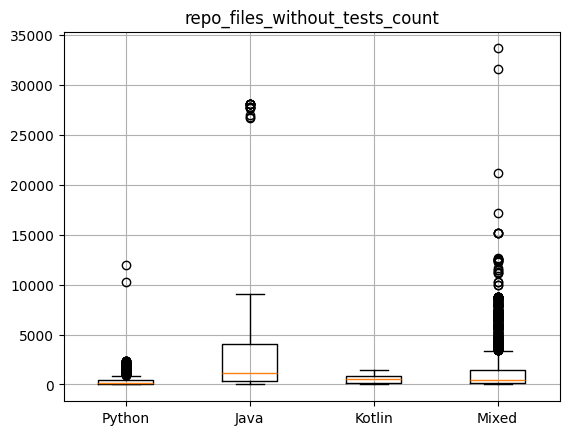

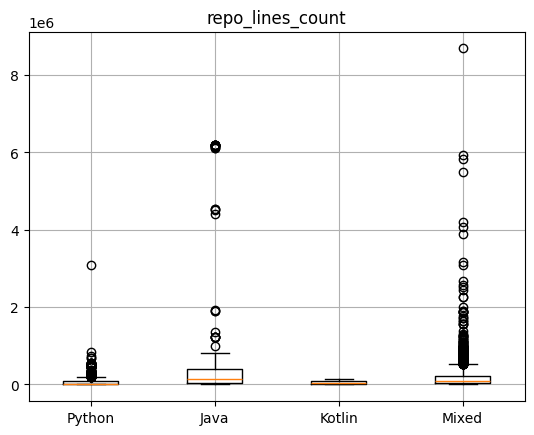

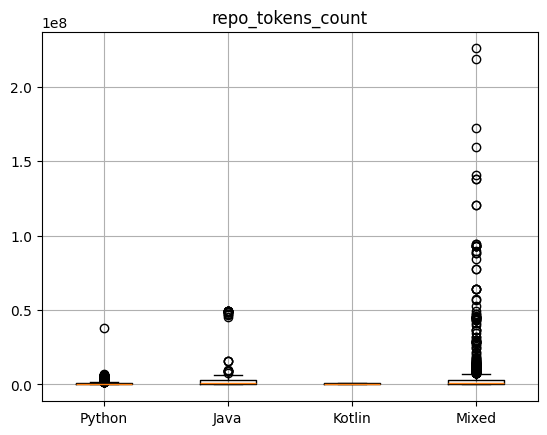

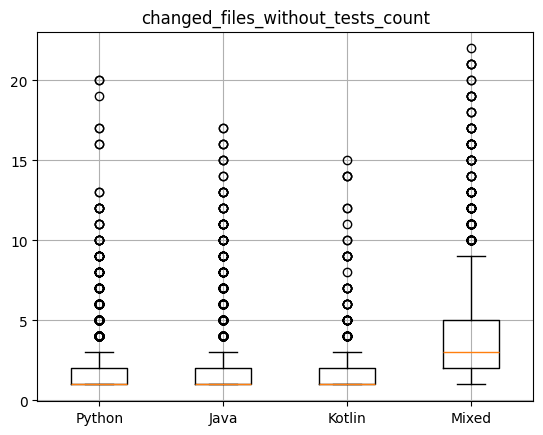

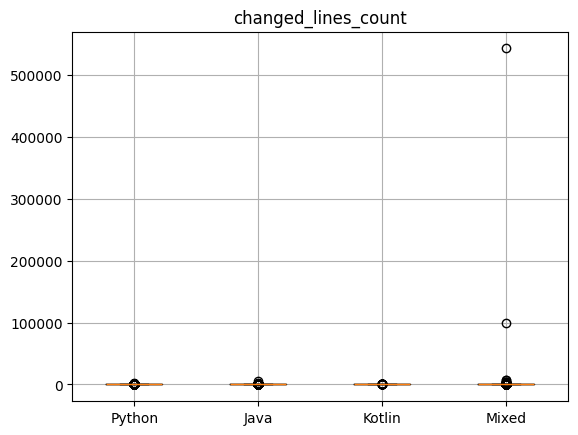

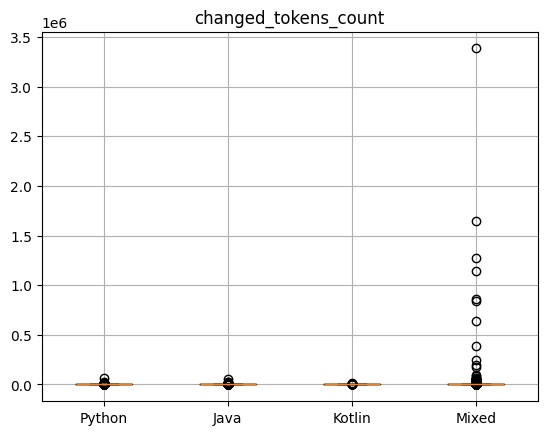

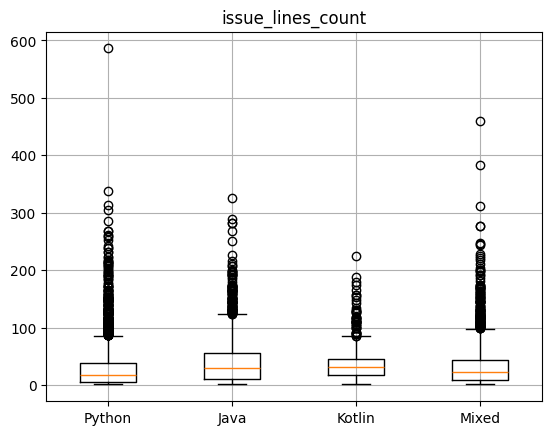

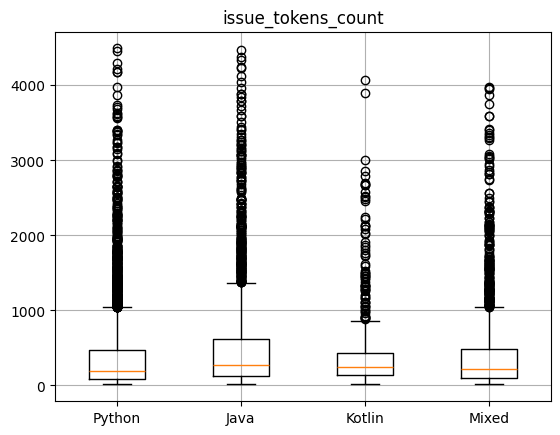

In [92]:
# Combine the arrays in a list
for entity, columns in [
    ('project', ['repo_files_without_tests_count', 'repo_lines_count', 'repo_tokens_count']),
    ('diff', ['changed_files_without_tests_count', 'changed_lines_count', 'changed_tokens_count']),
    ('issue', ['issue_lines_count', 'issue_tokens_count'])
]:
    for column in columns:
        data = []
        xticks = []
        for category, language in [('py', 'Python'), ('java', 'Java'), ('kt', 'Kotlin'), ('mixed', 'Mixed')]:
            data.append(dfs[category][column])
            xticks.append(language)
        plt.boxplot(data)
        plt.xticks([1, 2, 3, 4], xticks)
        plt.title(column)
        plt.grid(True)
        plt.show()

In [93]:
ind = dfs['mixed']['changed_lines_count'].idxmax()
print(dfs['mixed'].loc[ind]['diff'])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

